## 5章 GLMの尤度比検定と検定の非対称性

一定レベルとxレベルのポアソン分布で残差逸脱度の差を見て見る。

In [1]:
d <- read.csv('data3a.csv')
fit1 <- glm(y ~ 1, data=d, family=poisson)
fit2 <- glm(y ~ x, data=d, family=poisson)
fit1$deviance - fit2$deviance

[1] 4.513941

### PB法（パラメトリックブートストラップ法）・・・乱数生成に基づくアプローチ

In [2]:
d$y.rnd = rpois(100, lambda = mean(d$y))
fit1 <- glm(y.rnd ~ 1, data=d, family=poisson)
fit2 <- glm(y.rnd ~ x, data=d, family=poisson)
fit1$deviance - fit2$deviance

[1] 0.00151984

以上、帰無仮説（一定モデル）を仮定して、逸脱度の差を計算するのが、PB法の1ステップに相当する。<br>
これを繰り返すことで、逸脱度の差の分布を得ることができる。

<pre>
(1) 平均 mean(d$y) のポアソン乱数生成 -> d$y.rnd に格納
(2) d$y.rnd に対する一定モデル、xモデル を glm() で推定 -> 結果を fit1,fi2 で格納
(3) 逸脱度の差を計算
</pre>

以下はPB法実行の自作関数とその実行

In [3]:
get.dd <- function(d) {
    n.sample <- nrow(d)
    y.mean <- mean(d$y)
    d$y.rnd <- rpois(n.sample, lambda = y.mean)
    fit1 <- glm(y.rnd ~ 1, data=d, family=poisson)
    fit2 <- glm(y.rnd ~ x, data=d, family=poisson)
    fit1$deviance - fit2$deviance
}

pb <- function(d, n.bootstrap) {
    replicate(n.bootstrap, get.dd(d))
}

dd12 <- pb(d, n.bootstrap = 1000)
summary(dd12)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00000  0.08269  0.39023  0.95612  1.21823 10.71279 

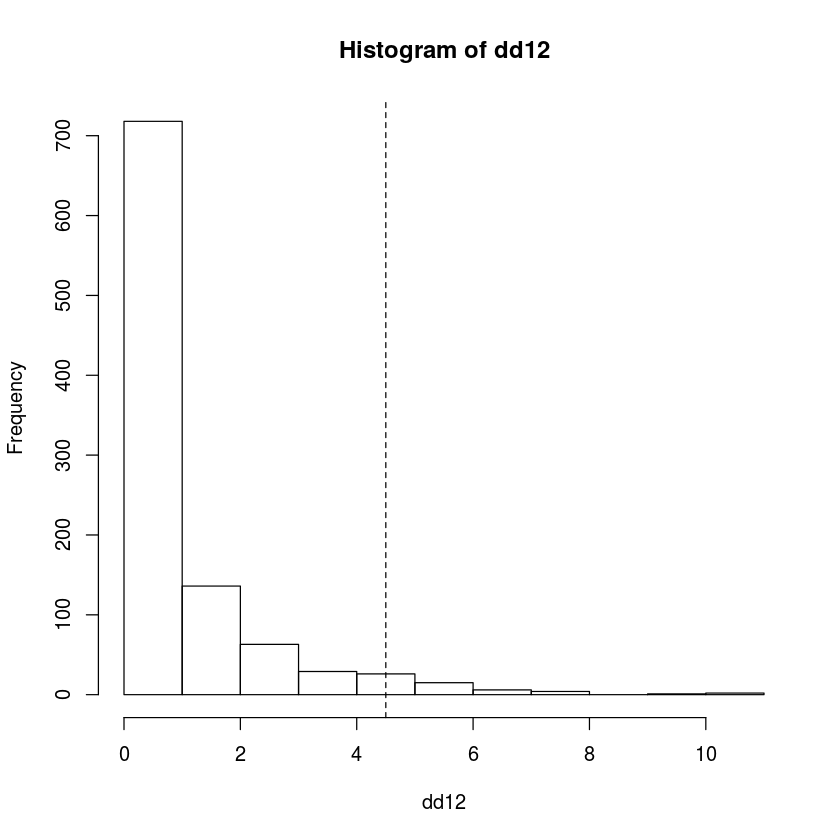

In [4]:
hist(dd12)
abline(v=4.5, lty = 2)

In [5]:
sum(dd12 >= 4.5)

[1] 44

In [6]:
P <- 28 / 1000
P

[1] 0.028

P < 0.05 なので、有意差がある。<br>
帰無仮説（一定モデル）は棄却されて x モデルが残るので、これを採択する。

In [7]:
quantile(dd12, 0.95)

95% 
4.27063

### $\chi^2$分布を使った近似計算法

In [8]:
fit1 <- glm(y ~ 1, data=d, family=poisson)
fit2 <- glm(y ~ x, data=d, family=poisson)
anova(fit1, fit2, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
99,89.50694,NA,NA,NA
98,84.99300,1,4.513941,0.03361969


test = "Chisq"　と指定することで、カイ自乗分布近似を利用できる。

$\chi^2$分布近似はサンプルサイズが大きい場合に有効な近似計算。

サンプルサイズが小さい場合は、PB法を使ってシミュレーションするのが良い。 <br>
等分散正規分布が仮定できる場合には、t分布（平均の差）やF分布（分散比）を<br>
使った方が正確な結果を得ることができる。

ただし、あくまで P 値は P 値であって、決して効果の大きさを言うものではない（それは効果量 effect size の仕事）

## 6章 GLMの応用範囲をひろげる

In [9]:
d <- read.csv('data4a.csv')
summary(d)
d

       N           y              x          f     
 Min.   :8   Min.   :0.00   Min.   : 7.660   C:50  
 1st Qu.:8   1st Qu.:3.00   1st Qu.: 9.338   T:50  
 Median :8   Median :6.00   Median : 9.965         
 Mean   :8   Mean   :5.08   Mean   : 9.967         
 3rd Qu.:8   3rd Qu.:8.00   3rd Qu.:10.770         
 Max.   :8   Max.   :8.00   Max.   :12.440         

N,y,x,f
8,1,9.76,C
8,6,10.48,C
8,5,10.83,C
8,6,10.94,C
8,1,9.37,C
8,1,8.81,C
8,3,9.49,C
8,6,11.02,C
8,0,7.97,C
8,8,11.55,C


白丸（C）は施肥処理なし、黒丸（T）は施肥処理あり。

x：植物の体サイズ<br>
y：生存種子数<br>
f:施肥処理の有無<br>

体サイズが大きくなると生存種子数は増える傾向<br>
肥料をやると生存種子数は増える傾向<br>

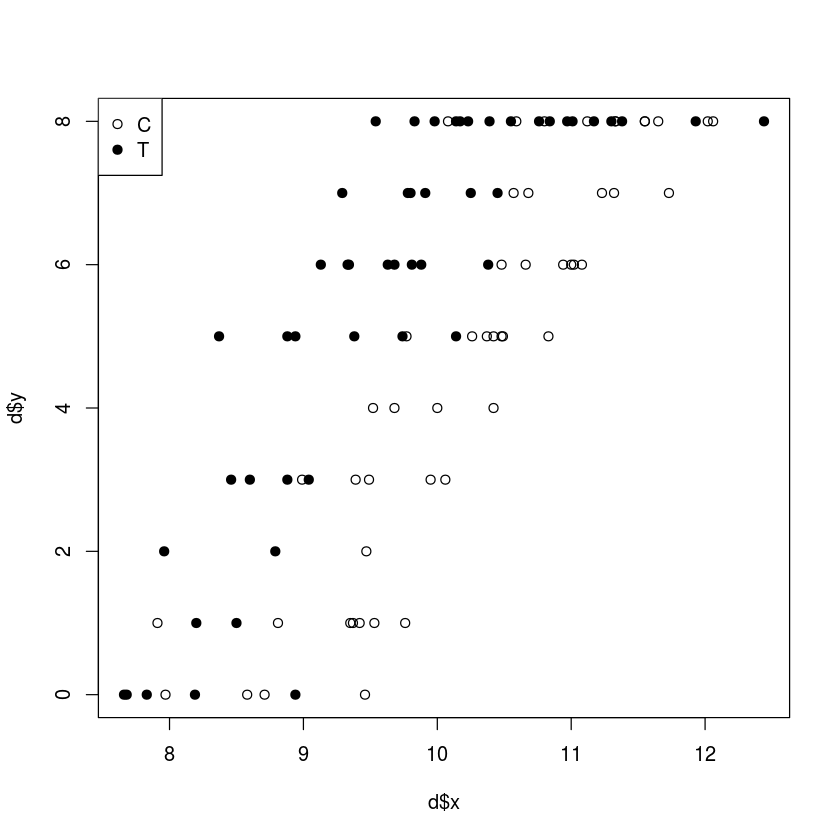

In [10]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
legend("topleft", legend=c("C", "T"), pch=c(21, 19))

### ロジスティック関数の概観

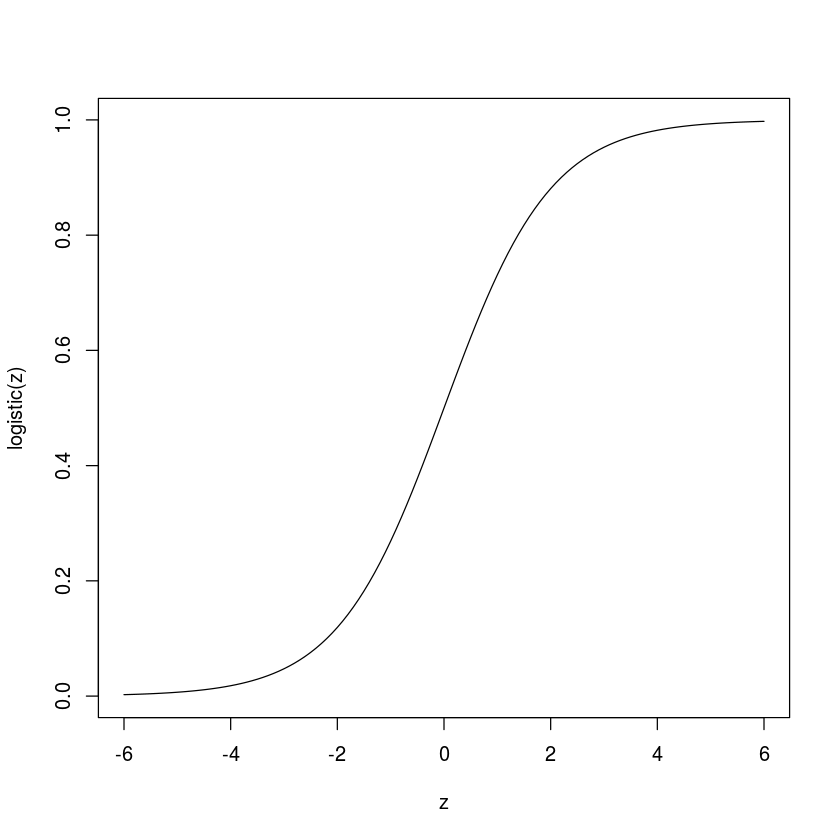

In [11]:
logistic <- function(z) 1 / (1 + exp(-z))
z <- seq(-6, 6, 0.1)
plot(z, logistic(z), type="l")

ロジスティック関数の逆関数がロジット関数。$logit(q_i) = \log\frac{q_i}{1 - q_i}$

### ◆行列の結合 rbindとcbind

rbindとcbindの違いは結合の方向です。rbindは縦につなげて、cbindは横につなげます。

rbindなら結合する行列の列数、cbindなら行数が合っていないとerrorが出ます。

In [12]:
fit <- glm(cbind(y, N-y) ~ x + f, data = d, family = binomial)
fit


Call:  glm(formula = cbind(y, N - y) ~ x + f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT  
    -19.536        1.952        2.022  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    499.2 
Residual Deviance: 123 	AIC: 272.2

family が binomial

応答変数が cbind(生存した数、死んだ数)すなわち、<br>
一列目が生存した種子 y、二列目が死んだ種子 N-y となります。

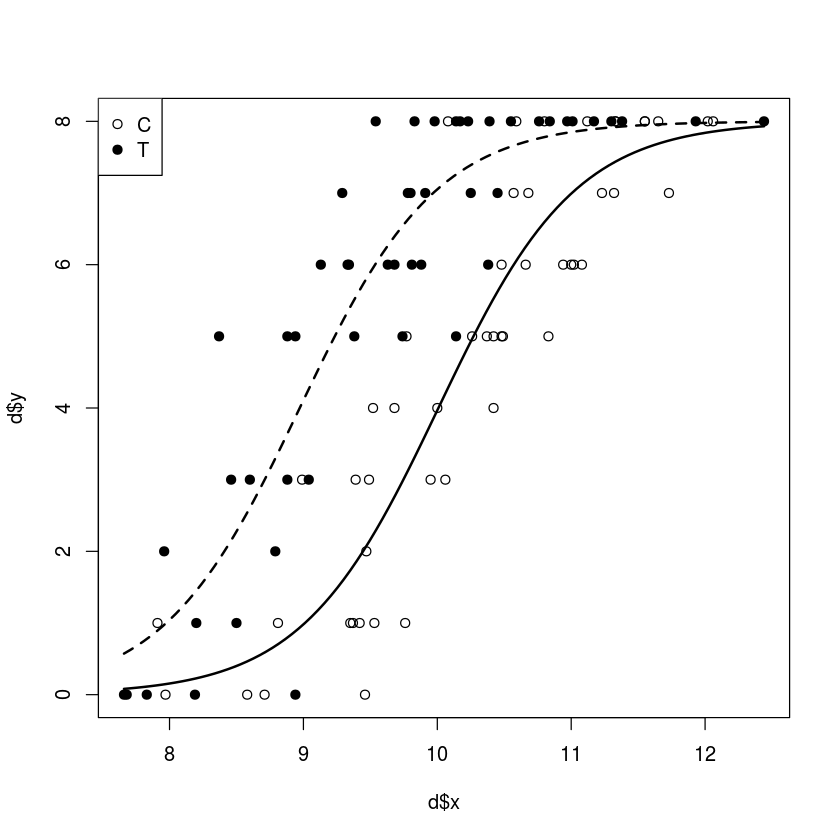

In [13]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
xx <- seq(min(d$x), max(d$x), length=100)
lines(xx, logistic(-19.536 + 1.952 * xx) * d$N, lwd = 2)
lines(xx, logistic(-19.536 + 1.952 * xx + 2.022) * d$N, lwd = 2, lty=2)
legend("topleft", legend=c("C", "T"), pch=c(21, 19))

### AIC によるモデル選択

In [14]:
library(MASS)
stepAIC(fit)

Start:  AIC=272.21
cbind(y, N - y) ~ x + f

       Df Deviance    AIC
<none>      123.03 272.21
- f     1   217.17 364.35
- x     1   490.58 637.76



Call:  glm(formula = cbind(y, N - y) ~ x + f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT  
    -19.536        1.952        2.022  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    499.2 
Residual Deviance: 123 	AIC: 272.2

-> AIC: 272.2 であることを確認。

### 交互作用を考える

交互作用とは、植物の体サイズ $x_i$ と施肥効果 $f_i$ の積の効果。

$ logit(q_i)=\beta_1+\beta_2 x_i + \beta_3 f_i + \beta_4 x_i f_i$

In [15]:
fit <- glm(cbind(y, N-y) ~ x + f + x : f, data = d, family = binomial)
fit


Call:  glm(formula = cbind(y, N - y) ~ x + f + x:f, family = binomial, 
    data = d)

Coefficients:
(Intercept)            x           fT         x:fT  
  -18.52332      1.85251     -0.06376      0.21634  

Degrees of Freedom: 99 Total (i.e. Null);  96 Residual
Null Deviance:	    499.2 
Residual Deviance: 122.4 	AIC: 273.6

・ 施肥なしの場合 fT,x:fTの係数は0なので、<br>
　　　　$ logit(q_i)=-18.5 + 1.85 x_i$

・ 施肥ありの場合<br>
　　　$ logit(q_i)= -18.5-0.0638+(1.85+0.216) x_i = -18.6 + 2.07 x_i $

交互作用によって、fT が大きく変わったように見えるが、実際に式を展開すると、そんなに変わらない。 

AICの変化<br>
　x＋fモデル　AIC=272.2 xfモデル AIC=273.6 -> 交互作用で悪化している

交互作用も考慮した図を示す。

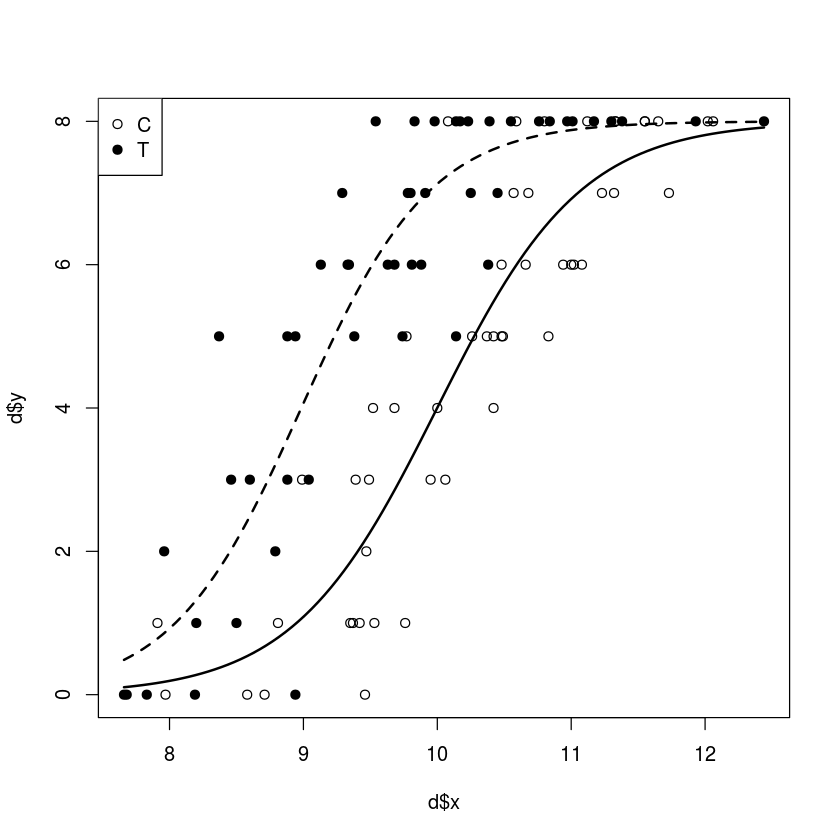

In [16]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
xx <- seq(min(d$x), max(d$x), length=100)
lines(xx, logistic(-18.52332 + 1.85251 * xx) * d$N, lwd = 2)
lines(xx, logistic(-18.52332 + 1.85251 * xx -0.06376 + 0.21634 * xx) * d$N, lwd = 2, lty=2)
legend("topleft", legend=c("C", "T"), pch=c(21, 19))

### オフセット項の導入

In [17]:
d <- read.csv('data4b.csv')
d

y,x,A
57,0.68,10.3
64,0.27,15.6
49,0.46,10.0
64,0.45,14.9
82,0.74,14.0
29,0.15,9.6
37,0.50,11.8
33,0.57,6.8
61,0.79,11.8
46,0.57,9.5


y: 植物個体数<br>
x: 調査地の明るさ<br>
A:面積<br>

$ \lambda_i = exp(\beta_1+\beta_2 x_i + log A_i ) $<br>
-> $\beta_1+\beta_2 x_i + log A_i$  が線形予測子で$log A_i$ がオフセット

In [18]:
glm(y ~ x, offset = log(A), family=poisson, data=d)


Call:  glm(formula = y ~ x, family = poisson, data = d, offset = log(A))

Coefficients:
(Intercept)            x  
     0.9731       1.0383  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    261.5 
Residual Deviance: 81.61 	AIC: 650.3

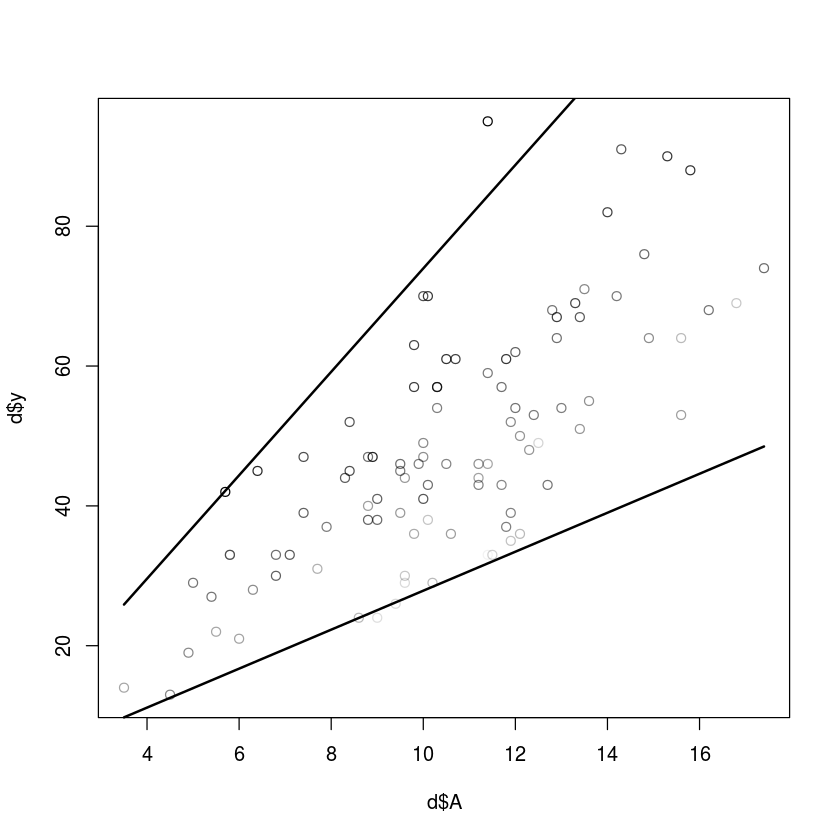

In [19]:
plot(d$A, d$y, col=rgb(0, 0, 0, alpha=d$x))
xx <- seq(min(d$A), max(d$A), length=100)
lines(xx, exp(0.9731 + 1.0383 * min(d$x) + log(xx)), lwd = 2)
lines(xx, exp(0.9731 + 1.0383 * max(d$x) + log(xx)), lwd = 2)

### 正規分布を使ってみる

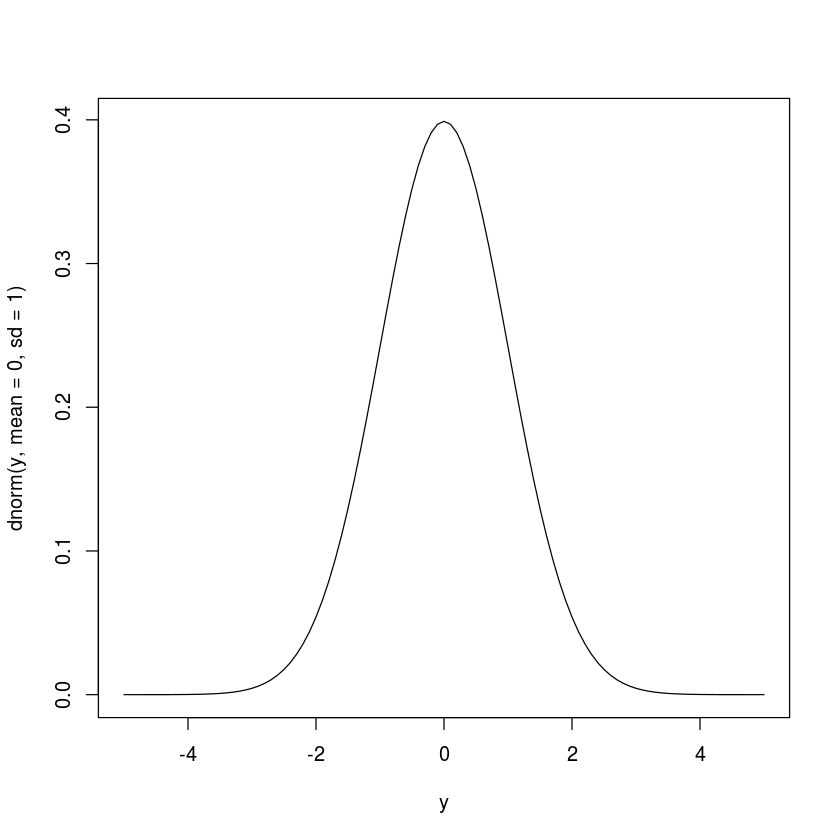

In [20]:
y <- seq(-5, 5, 0.1)
plot(y, dnorm(y, mean = 0, sd = 1), type="l")

平均$\mu=0$, 標準偏差$\sigma=1$の正規分布で、<br>
$1.2 \leq y \leq 1.8$ なる確率を計算したい場合は、下記のようにする。

In [21]:
pnorm(1.8, 0, 1) - pnorm(1.2, 0, 1)

[1] 0.07913935

長方形で近似するという手もある。

In [22]:
(1.8 - 1.2) * dnorm(1.5, mean=0, sd=1)

[1] 0.07771056

### ガンマ分布を使ってみる

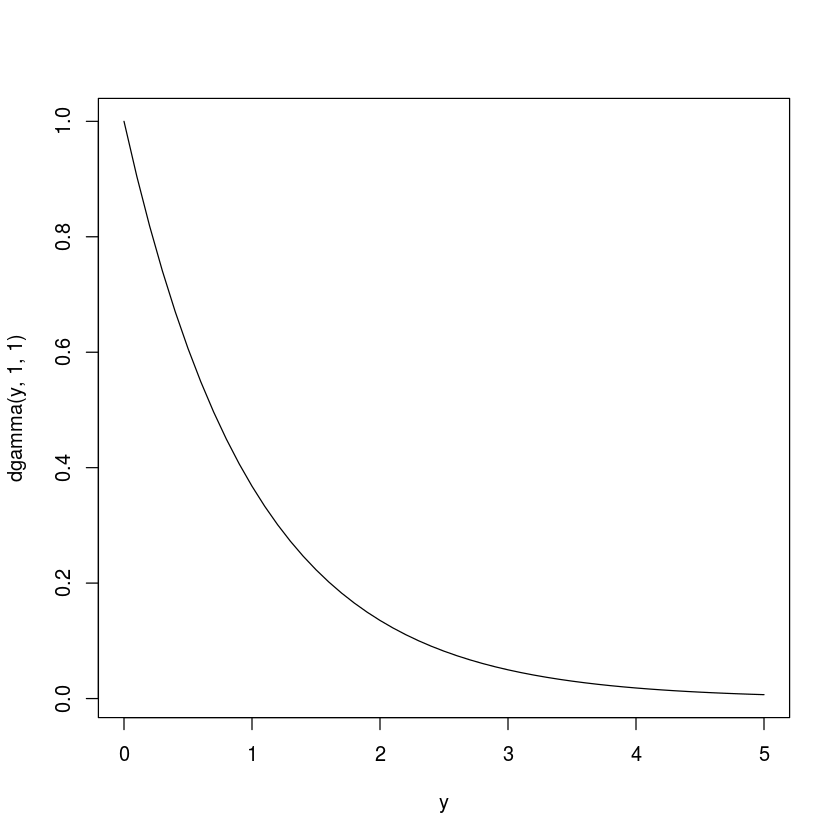

In [23]:
y <- seq(0, 5, 0.1)
plot(y, dgamma(y, 1, 1), type="l")

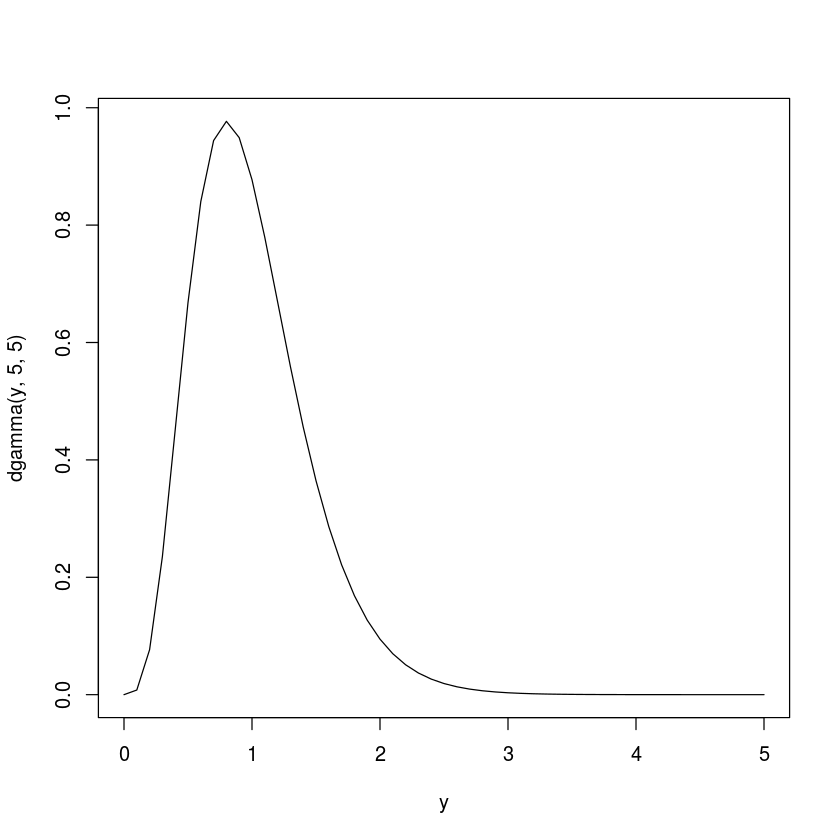

In [24]:
plot(y, dgamma(y, 5, 5), type="l")

In [25]:
d <- read.csv('data4c.csv')
d

x,y
0.00100000,0.0008873584
0.01730612,0.0234652100
0.03361224,0.0698755600
0.04991837,0.0343402500
0.06622449,0.0265204000
0.08253061,0.1592148000
0.09883673,0.1650784000
0.11514290,0.1240029000
0.13144900,0.0596455000
0.14775510,0.0552452700


$\mu_i$: 平均花重量<br>
$x_i$: 葉重量<br>

$\mu_i= Ax_i^{b}$ とすると、$A=exp(a)$とすると<br>
$\mu_i=exp(a)x_i^{b}=exp(a+b log x_i) $

$log \mu_i=a+b log x_i$<br>
-> 線形変数は $x_i$ ではなく $log x_i$, 推定パラメータは 切片a,傾き b, リンク関数は対数リンク関数


Call:  glm(formula = y ~ log(x), family = Gamma(link = "log"), data = d)

Coefficients:
(Intercept)       log(x)  
    -1.0403       0.6833  

Degrees of Freedom: 49 Total (i.e. Null);  48 Residual
Null Deviance:	    35.37 
Residual Deviance: 17.25 	AIC: -110.9

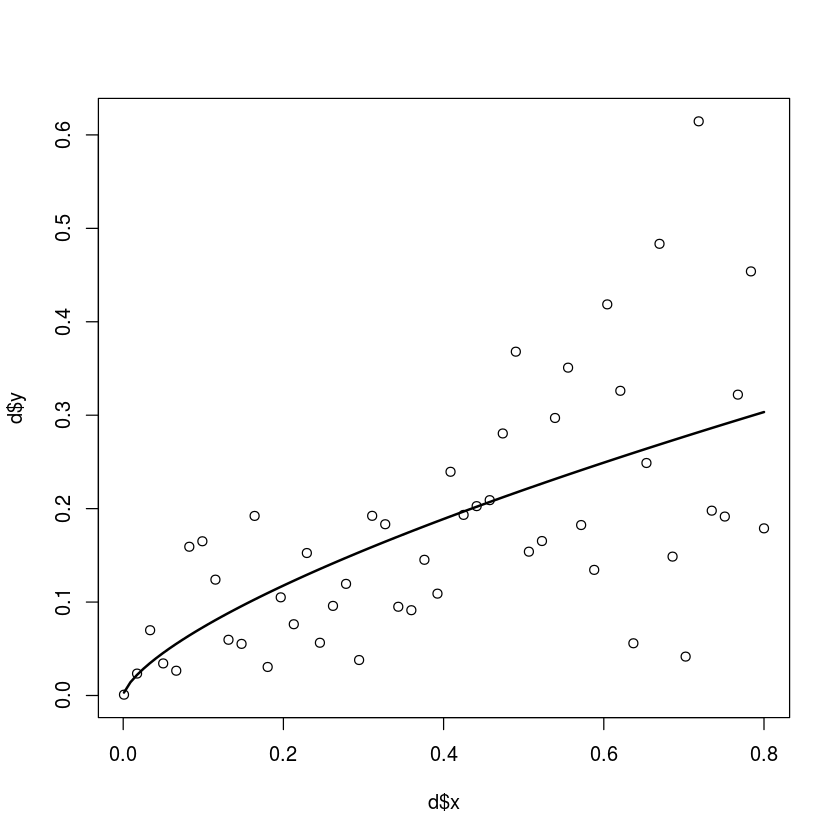

In [26]:
fit <- glm(y ~ log(x), family = Gamma(link = "log"), data = d)
fit
plot(d$x, d$y)
xx <- seq(min(d$x), max(d$x), length=100)
lines(xx, exp(-1.0403 + 0.6833 * log(xx)), lwd = 2)

## 7章 一般化線形混合モデル(GLMM)

### まずは、データを読み込む

In [27]:
d <- read.csv('data5.csv')
summary(d)

       N           y              x           id        
 Min.   :8   Min.   :0.00   Min.   :2   Min.   :  1.00  
 1st Qu.:8   1st Qu.:1.00   1st Qu.:3   1st Qu.: 25.75  
 Median :8   Median :3.00   Median :4   Median : 50.50  
 Mean   :8   Mean   :3.81   Mean   :4   Mean   : 50.50  
 3rd Qu.:8   3rd Qu.:7.00   3rd Qu.:5   3rd Qu.: 75.25  
 Max.   :8   Max.   :8.00   Max.   :6   Max.   :100.00  

生存種子数 y は二項分布に従うとして、fitting を行う。

In [28]:
fit <- glm(cbind(y, N-y) ~ x, data=d, family=binomial)
fit


Call:  glm(formula = cbind(y, N - y) ~ x, family = binomial, data = d)

Coefficients:
(Intercept)            x  
    -2.1487       0.5104  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    607.4 
Residual Deviance: 513.8 	AIC: 649.6

fitting は行われたが、真の傾き$\hat{\beta}_2=1$と比べると推定値$\beta_2=0.51$は小さい。

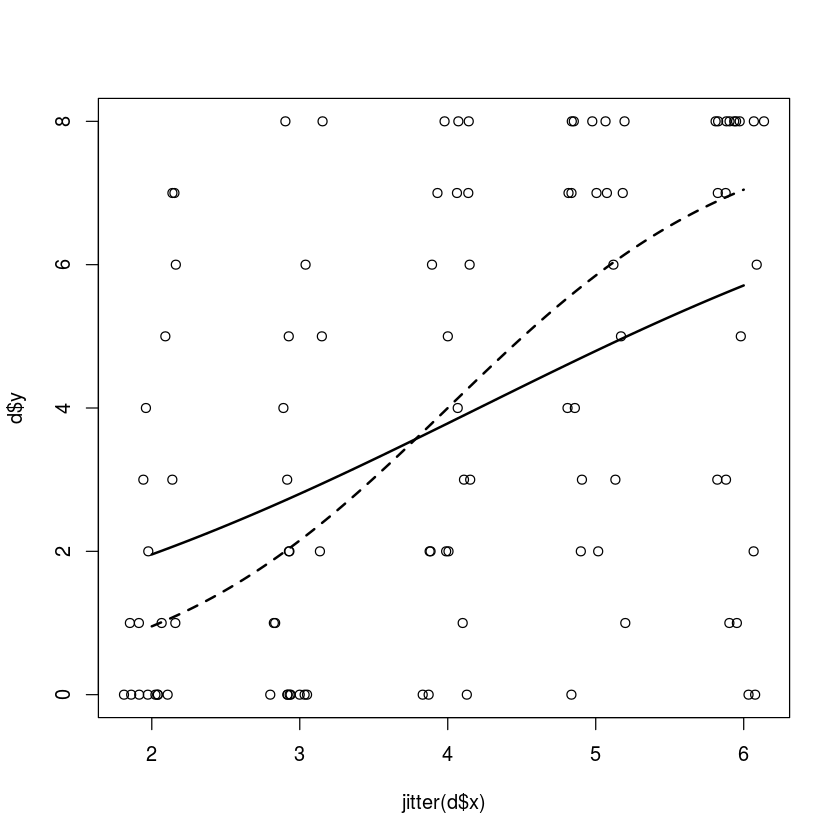

In [29]:
logistic <- function(z) 1 / (1 + exp(-z))
plot(jitter(d$x), d$y)
xx <- seq(min(d$x), max(d$x), length=100)
lines(xx, logistic(-2.1487 + 0.5104 * xx)*d$N, lwd=2)
lines(xx, logistic(-4 + 1 * xx)*d$N, lwd=2, lty=2)

$x_i=4$である個体に絞って見てみると、<br> 
本来は線で示した二項分布に乗るはずだが、実際は大きく異なる分布を見せている。

       N           y              x           id       
 Min.   :8   Min.   :0.00   Min.   :4   Min.   :41.00  
 1st Qu.:8   1st Qu.:2.00   1st Qu.:4   1st Qu.:45.75  
 Median :8   Median :3.50   Median :4   Median :50.50  
 Mean   :8   Mean   :4.05   Mean   :4   Mean   :50.50  
 3rd Qu.:8   3rd Qu.:7.00   3rd Qu.:4   3rd Qu.:55.25  
 Max.   :8   Max.   :8.00   Max.   :4   Max.   :60.00  

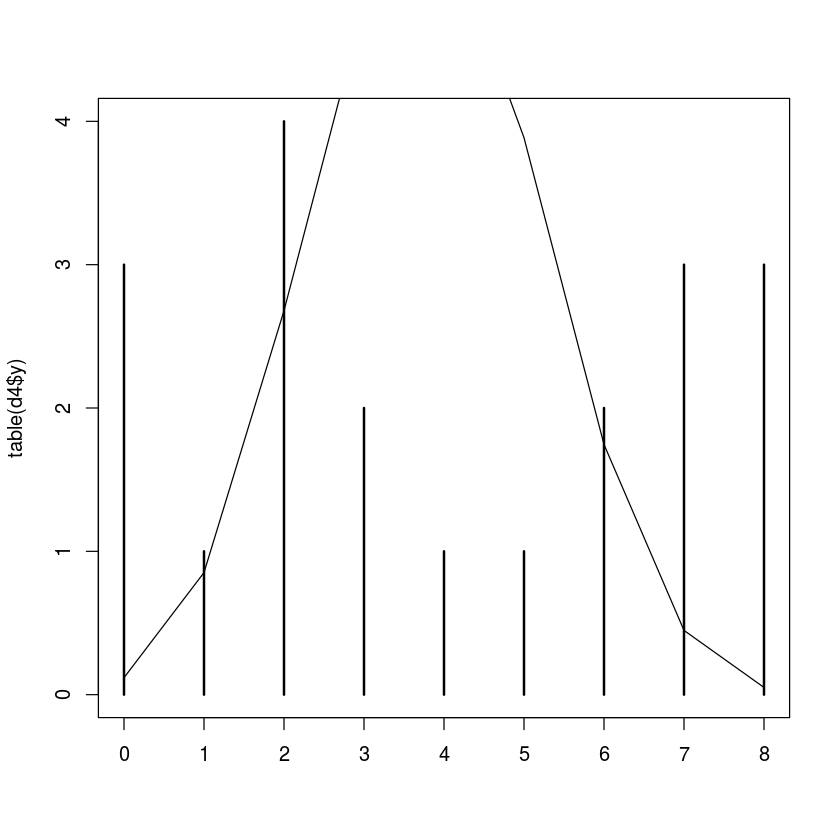

In [30]:
d4 <- d[d$x==4,]
summary(d4)
plot(table(d4$y))
y <- seq(0, 8, 1)
lines(y, dbinom(y, mean(d$N), logistic(-2.1487 + 0.5104 * 4)) * length(d4$y))

だいぶ二項分布とは異なる。

### 過分散と個体差

In [31]:
c(mean(d4$y), var(d4$y))

[1] 4.050000 8.365789

### 過分散（overdispersion）

二項分布に従うなら<br>
平均は 全生存数/全調査種子数=4.05/8=0.5 くらいで、<br>
分散は Nq(1-q)=8 ✖︎ 0.5 ✖︎ (1-0.5) = 2<br>
くらいになるはずなのに、実際の分散は 8.4 と大きい。 <br>
-> 二項分布の過分散（overdispersion）の例<br>
  -> 全個体の生存種子数の分布は、ただ一つの二項分布で説明できる<br>
       と期待したのに失敗した。

個体が持つ要因によって予想よりも分散が大きくなってしまっている。<br>
→実際の現象ではよく起こること。 そこで、個体差を表すパラメタ $r_i$ を線形予測子に導入する。

個体差＝データとして定量化も識別もされていないけど、各個体の何かに起因しているように見える差

観測者は架空植物に影響を与えている要因を全て定量・特定することはできない<br>
-> 個体差や場所差を原因不明のまま、これらの影響をうまく取り込んだ統計モデルが必要。

## 一般化線形混合モデル

個体差や場所差の効果をGLMに組み込んだ統計モデル

$ logit(q_i)=\beta_1+\beta_2 x_i + \gamma_i $

$\gamma_i  $ : 個体 $i$ の個体差を表すパラメータ,$-\infty $ から $\infty $ までの範囲をとる連続値

固定効果(fixed effect)：y の平均にだけ影響およぼす<br>
ランダム効果(random effect)：y の分散 (ばらつき) にだけ影響およぼす

両方含むものは混合モデル(mixed model)<br>
-> $\beta_1+\beta_2 x_i + \gamma_i $ は、切片$\beta_1$, 葉数 $\beta_2$ は固定効果、個体差 $\gamma_i$ はランダム効果。両方含むので、混合モデル

In [32]:
#install.packages("glmmML")

In [33]:
library(glmmML)
glmmML(cbind(y, N-y) ~ x, data=d, family=binomial, cluster=id)


Call:  glmmML(formula = cbind(y, N - y) ~ x, family = binomial, data = d,      cluster = id) 


              coef se(coef)      z Pr(>|z|)
(Intercept) -4.190   0.8777 -4.774 1.81e-06
x            1.005   0.2075  4.843 1.28e-06

Scale parameter in mixing distribution:  2.408 gaussian 
Std. Error:                              0.2202 

        LR p-value for H_0: sigma = 0:  2.136e-55 

Residual deviance: 269.4 on 97 degrees of freedom 	AIC: 275.4 

## 結果検証

係数：β1=-4.190(真の値は-4), β2=1.005(真の値は1) -> うまく推定出来ている

スケールパラメータ：個体差のばらつき rのこと=s 2.408 -> sの推定値 真の値は3なので過小推定されている

100個のデータに対して3つのパラメータ(β1,β2,s)を使用しているので、使える残りの自由度は<br>
100 - 3 = 97 (on 97 degrees of freedom )

AICは275.4

### 反復・疑似反復

GLMMを採用するかどうかの判断のポイントは、<br>
GLMによるモデリングでは過分散になるかどうかよりも、<br>
個体差・場所差が識別できてしまうデータの取り方をしているか、<br>
つまり疑似反復をしているかどうかである。

「個体から複数のデータをとる」ことを<b>擬似反復</b>といい、<br>
同じ個体から得られたデータは似た傾向を持つと考えられるため、<br>
個体差を考慮しなければ推定結果に偏りが生じるためである。<br>

(A) 個体・植木鉢が反復<br>
・1個体/植木鉢 かつ 1種子/個体<br>
・個体差と植木鉢差を区別できない<br>
・GLMで推定して問題ない<br>

(B) 個体は疑似反復、植木鉢は反復<br>
・1個体/植木鉢 かつ n種子/個体<br>
・e.x. 個体Aから得られた種子は生きてるのが多いが、<br>
　個体Bから得られた種子は死んでいるのが多い<br>
・植木鉢に植わっている個体は1つだけなので、<br>
　その差が個体差によるものか植木鉢差によるものか区別できない<br>
・個体差を考慮したGLMMで推定する<br>

(C) 個体は反復・植木鉢は疑似反復<br>
・n個体/植木鉢 かつ 1種子/個体<br>
・e.x. 植木鉢Aから得られた種子は死んでいるのが多いが、<br>
　植木鉢Bから得られた種子は生きているのが多い<br>
・個体から得る種子は1つだけなので、<br>
　その差が個体差によるものか植木鉢差によるものか区別できない<br>
・植木鉢差を考慮したGLMMで推定する<br>

(D) 個体・植木鉢が擬似反復<br>
・n個体/植木鉢 かつ n種子/個体<br>
・個体差・植木鉢差を考慮したGLMMで推定する<br>

なお、(D)のように2つのランダム効果を考慮しながら最尤推定するのは難しいので、<br>
GLMMと最尤推定ではなくベイズモデルとMCMCが実際にはよく使われる？

## まとめ

・GLMでは全個体が均質と仮定してモデリングするが、<br>
　現実のデータでは個体差が存在するため、<br>
　GLMによるモデリングよりも過分散になる<br>

・個体差・場所差を組み込んだモデリングをおこなうには<br>
　一般化線形混合モデル(GLMM)を使用する<br>

・GLMMを適用するのはデータが過分散となるかどうかよりも<br>
　擬似反復となるようなデータの取り方をしているかどうかである<br>

## 8. MCMC

[1] 0.45625

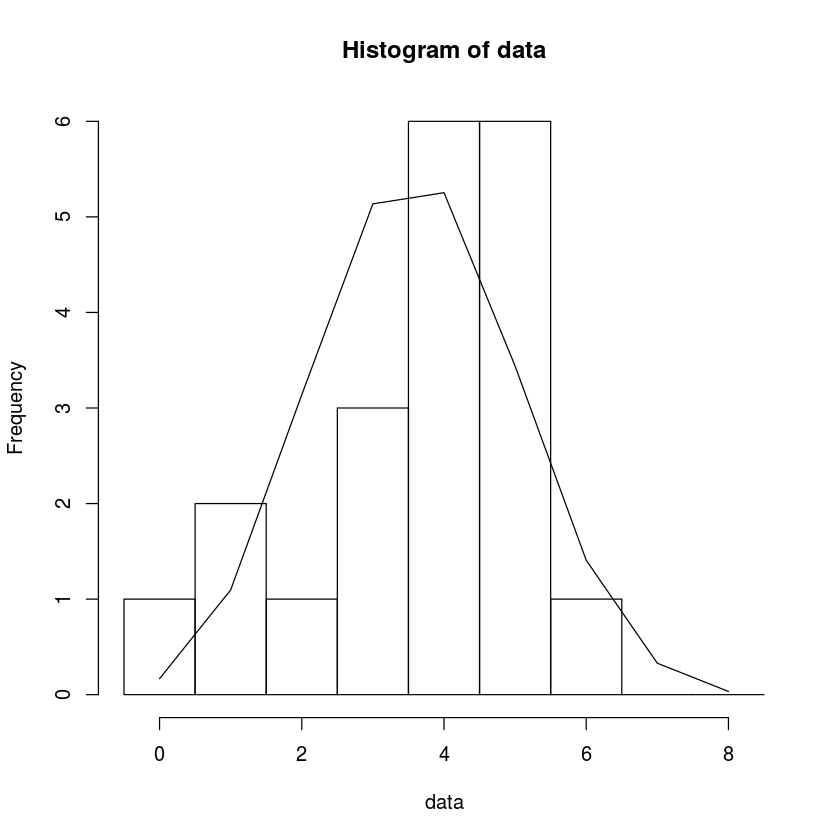

In [34]:
data <- c(4,3,4,5,5,2,3,1,4,0,1,5,5,6,5,4,4,5,3,4)
sum(data) / (8 * 20)
hist(data, breaks=seq(-0.5, 8.5, 1))
xx <- seq(0, 8, 1)
lines(xx, dbinom(xx, 8, 0.45)*length(data))

### ◆二項分布の計算

dbinom：ちょうど x 回成功する確率<br>
pbinom：成功回数が q 回以下である確率<br>
qbinom：二項分布のパーセント点<br>
rbinom：二項分布からサンプルを抽出<br>

dbinom(4, 10, 0.3)<br>
説明：成功確率が 0.3 である試行を 10 回行ったときに、4 回成功する確率を計算。

### 参考文献

ランダム効果とは<br>
http://hosho.ees.hokudai.ac.jp/~kubo/ce/RandomEffectsCrawley.html

glammML<br>
https://cran.r-project.org/

Rで二項分布の計算をする（dbinomなど）<br>
https://mathwords.net/dbinom
